In [12]:
import anndata as ad
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import scrublet as scr

In [2]:
m5_adata_egfp = ad.read_h5ad("/blue/square.t/peter.huynh/jupyter/combined_samples_scvelo/data/processed/m5_adata_egfp.h5ad")
m4_adata_egfp = ad.read_h5ad("/blue/square.t/peter.huynh/jupyter/combined_samples_scvelo/data/processed/m4_adata_egfp.h5ad")
p5_1_adata_egfp = ad.read_h5ad("/blue/square.t/peter.huynh/jupyter/combined_samples_scvelo/data/processed/p5_1_adata_egfp.h5ad")
p5_2_adata_egfp = ad.read_h5ad("/blue/square.t/peter.huynh/jupyter/combined_samples_scvelo/data/processed/p5_2_adata_egfp.h5ad")
p4_adata_egfp = ad.read_h5ad("/blue/square.t/peter.huynh/jupyter/combined_samples_scvelo/data/processed/p4_adata_egfp.h5ad")

In [5]:
adatas = {
    'm5': m5_adata_egfp,
    'm4': m4_adata_egfp,
    'p5_1': p5_1_adata_egfp,
    'p5_2': p5_2_adata_egfp,
    'p4': p4_adata_egfp
}

/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


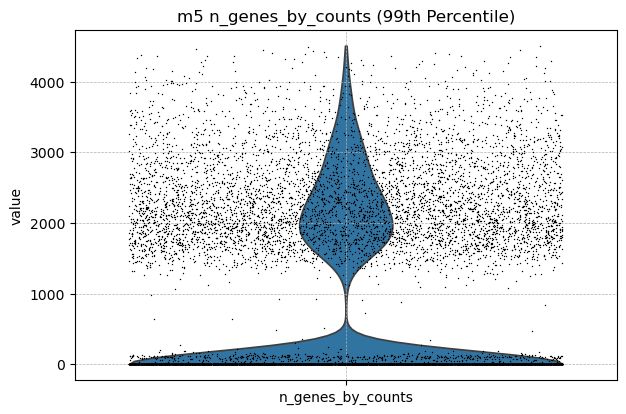

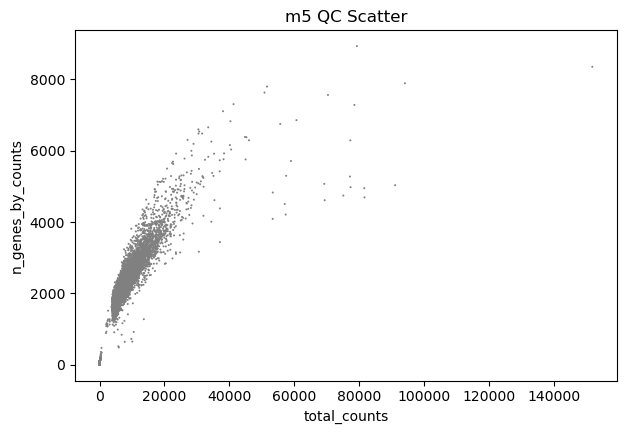

/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


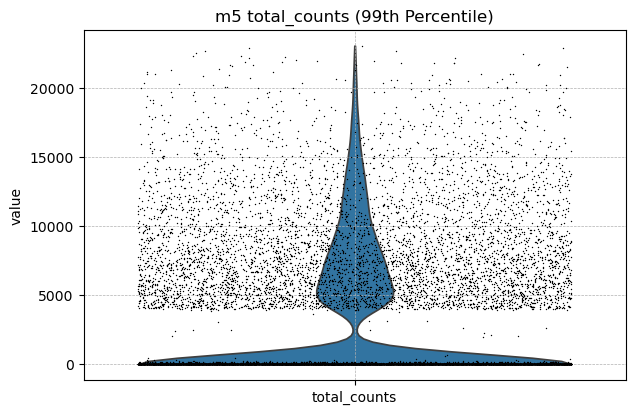

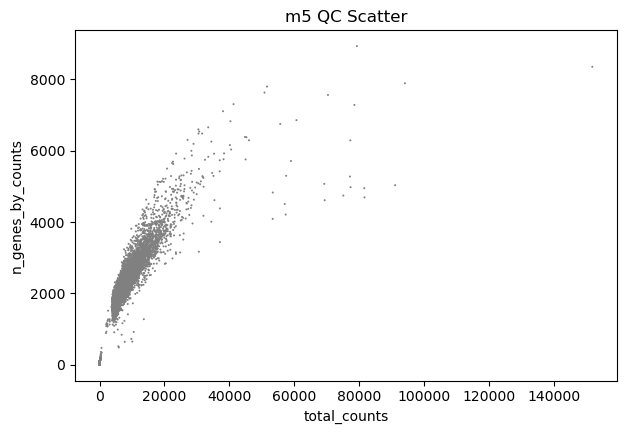

/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


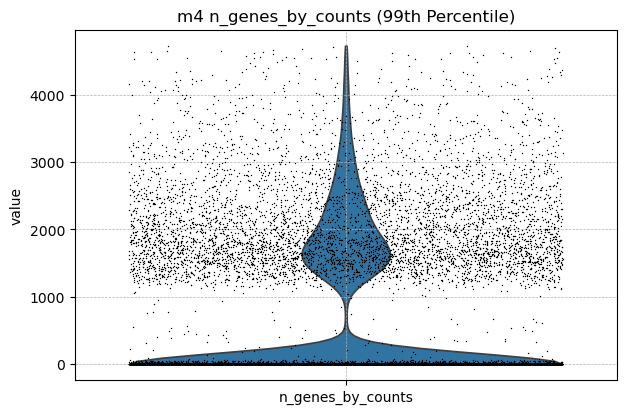

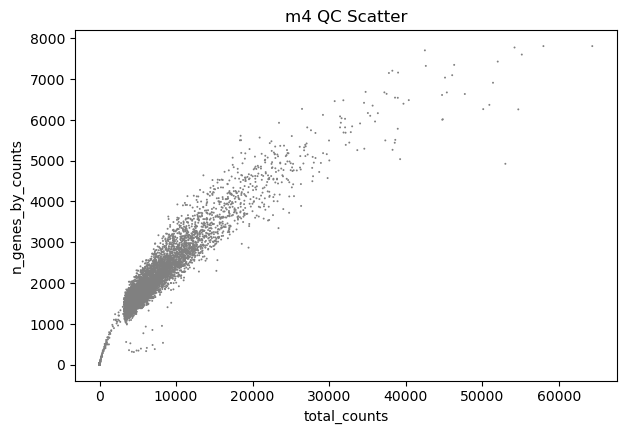

/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


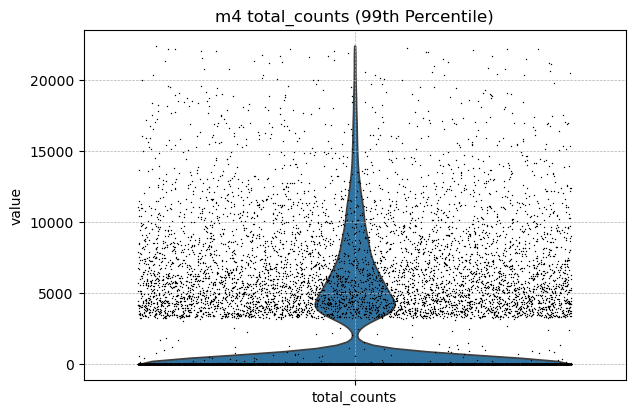

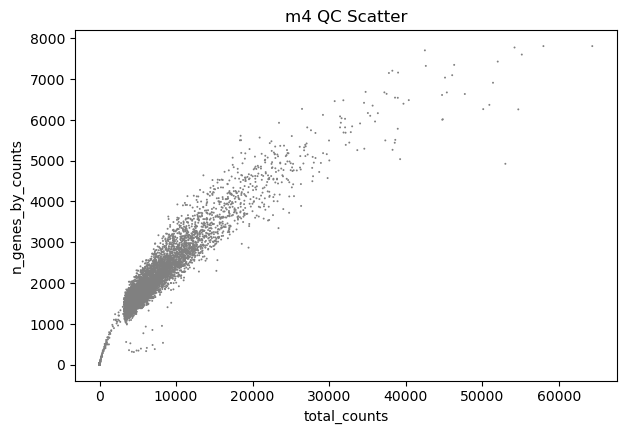

/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


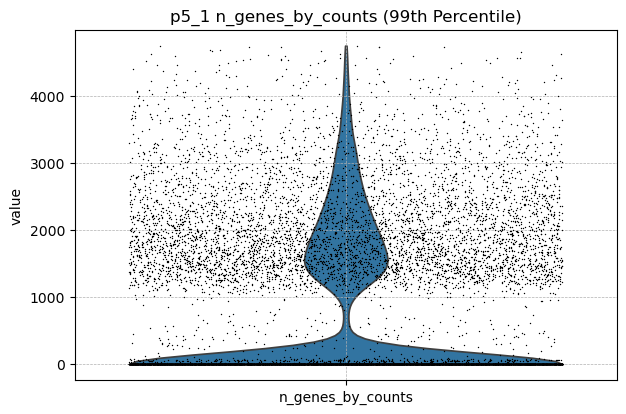

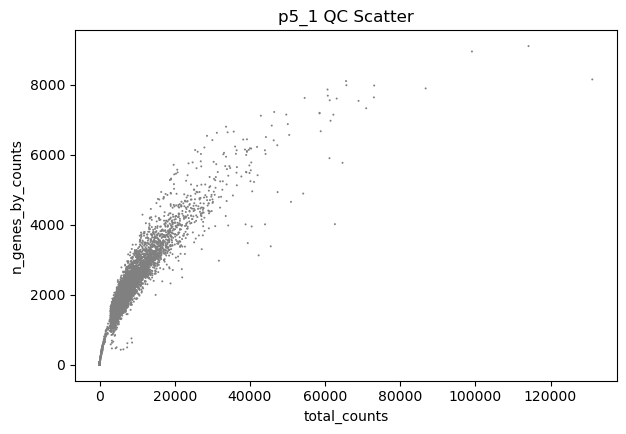

/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


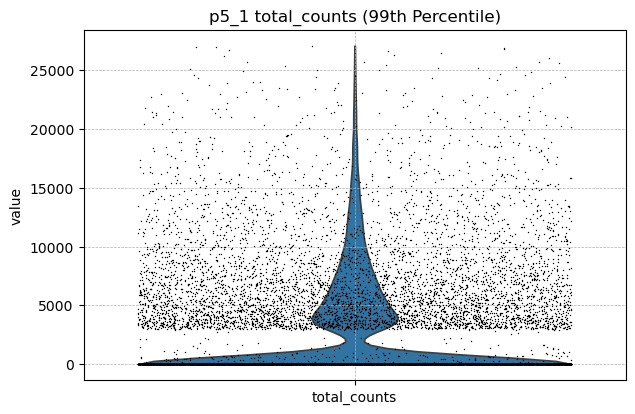

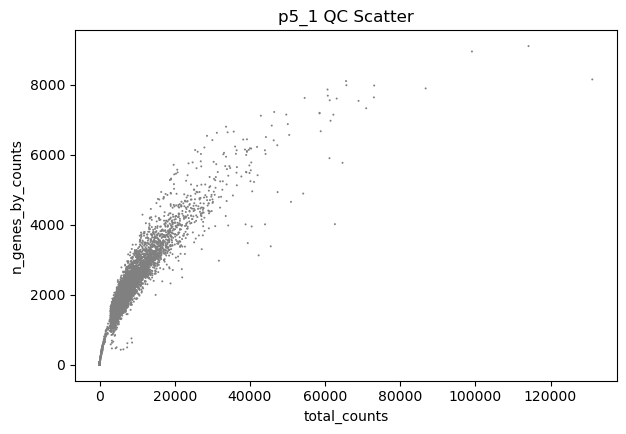

/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


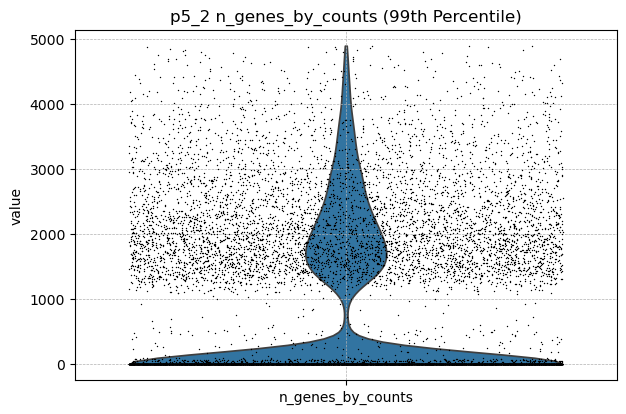

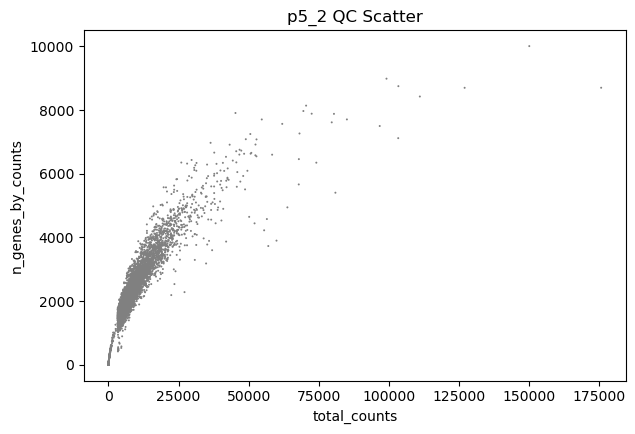

/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


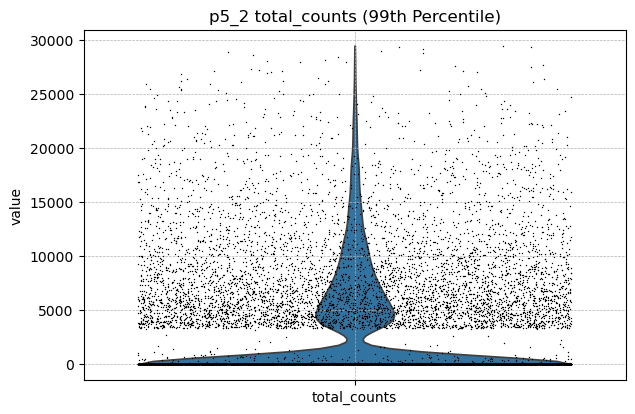

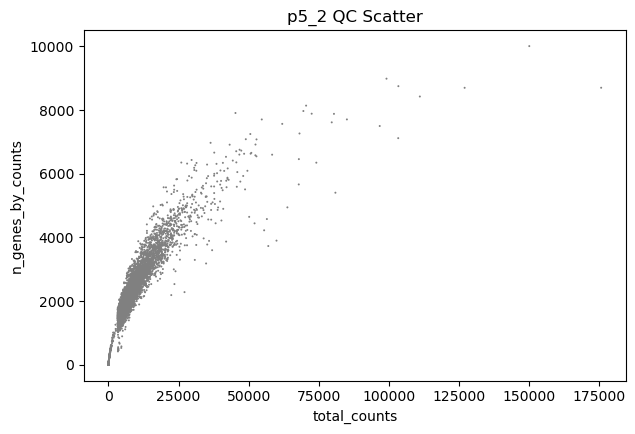

/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


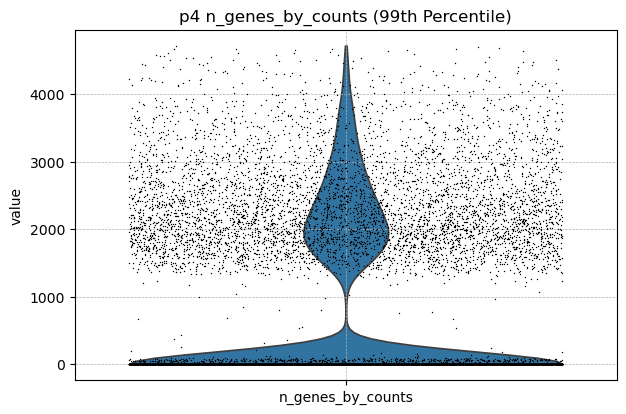

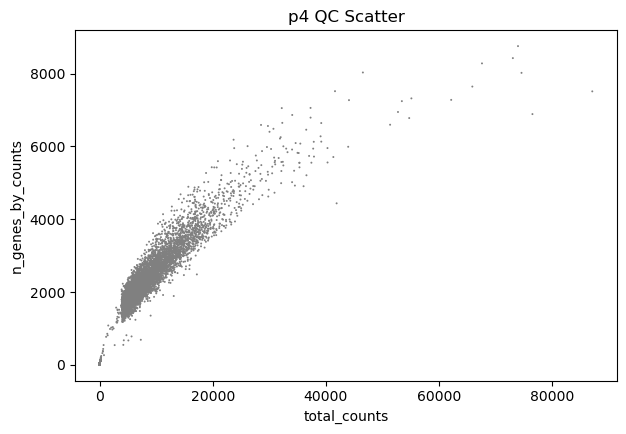

/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


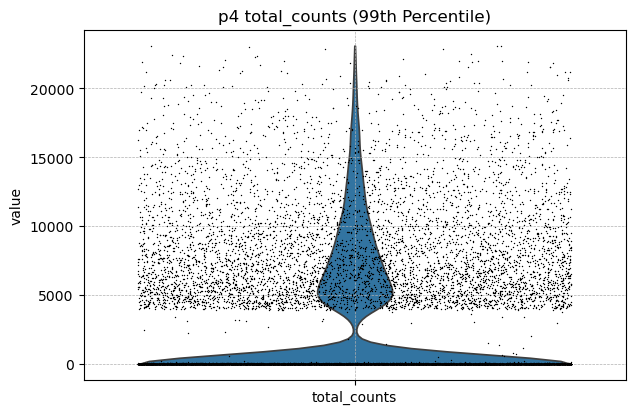

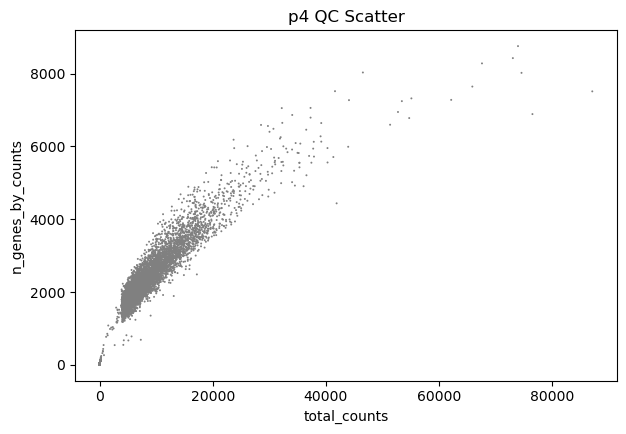

In [10]:
for name, adata in adatas.items():
    counts_cutoff = np.percentile(adata.obs['total_counts'], 99)
    genes_cutoff = np.percentile(adata.obs['n_genes_by_counts'], 99)

    adata_qc = adata[
        (adata.obs['total_counts'] < counts_cutoff) & 
        (adata.obs['n_genes_by_counts'] < genes_cutoff)
    ]

    for feature in ['n_genes_by_counts', 'total_counts']:
        sc.pl.violin(
            adata_qc,
            feature,
            jitter=0.4,
            show=False
        )
        plt.title(f"{name} {feature} (99th Percentile)")
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.show()

        sc.pl.scatter(
        adata,
        x='total_counts',
        y='n_genes_by_counts',
        show=True,
        title=f"{name} QC Scatter"
    )

In [11]:
sc.pp.filter_cells(m5_adata_egfp, min_genes=1000)
sc.pp.filter_cells(m5_adata_egfp, max_genes=5000)
m5_adata_egfp = m5_adata_egfp[m5_adata_egfp.obs['total_counts'] < 25000, :] #(Number of UMI per cell)
m5_adata_egfp = m5_adata_egfp[m5_adata_egfp.obs['total_counts'] > 2500, :] #(Number of UMI per cell)

sc.pp.filter_genes(m5_adata_egfp, min_cells=3)

sc.pp.filter_cells(m4_adata_egfp, min_genes=1000)
sc.pp.filter_cells(m4_adata_egfp, max_genes=5000)
m4_adata_egfp = m4_adata_egfp[m4_adata_egfp.obs['total_counts'] < 25000, :] #(Number of UMI per cell)
m4_adata_egfp = m4_adata_egfp[m4_adata_egfp.obs['total_counts'] > 1000, :] #(Number of UMI per cell)
sc.pp.filter_genes(m4_adata_egfp, min_cells=3)

sc.pp.filter_cells(p5_1_adata_egfp, min_genes=750)
sc.pp.filter_cells(p5_1_adata_egfp, max_genes=5000)
p5_1_adata_egfp = p5_1_adata_egfp[p5_1_adata_egfp.obs['total_counts'] < 25000, :] #(Number of UMI per cell)
p5_1_adata_egfp = p5_1_adata_egfp[p5_1_adata_egfp.obs['total_counts'] > 1000, :] #(Number of UMI per cell)
sc.pp.filter_genes(p5_1_adata_egfp, min_cells=3)

sc.pp.filter_cells(p5_2_adata_egfp, min_genes=1000)
sc.pp.filter_cells(p5_2_adata_egfp, max_genes=5000)
p5_2_adata_egfp = p5_2_adata_egfp[p5_2_adata_egfp.obs['total_counts'] < 30000, :] #(Number of UMI per cell)
p5_2_adata_egfp = p5_2_adata_egfp[p5_2_adata_egfp.obs['total_counts'] > 1000, :] #(Number of UMI per cell)
sc.pp.filter_genes(p5_2_adata_egfp, min_cells=3)

sc.pp.filter_cells(p4_adata_egfp, min_genes=1000)
sc.pp.filter_cells(p4_adata_egfp, max_genes=5000)
p4_adata_egfp = p4_adata_egfp[p4_adata_egfp.obs['total_counts'] < 30000, :] #(Number of UMI per cell)
p4_adata_egfp = p4_adata_egfp[p4_adata_egfp.obs['total_counts'] > 1000, :] #(Number of UMI per cell)
sc.pp.filter_genes(p4_adata_egfp, min_cells=3)

/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.50
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 2.3%
Overall doublet rate:
	Expected   = 4.0%
	Estimated  = 6.5%
Elapsed time: 5.3 seconds


<Figure size 640x480 with 0 Axes>

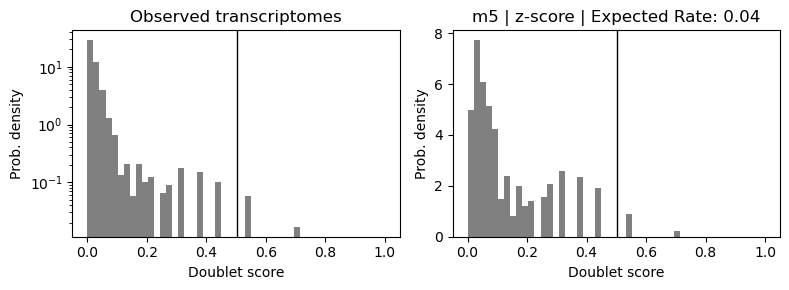

Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.16
Detected doublet rate = 3.8%
Estimated detectable doublet fraction = 61.6%
Overall doublet rate:
	Expected   = 4.0%
	Estimated  = 6.1%
Elapsed time: 4.0 seconds


<Figure size 640x480 with 0 Axes>

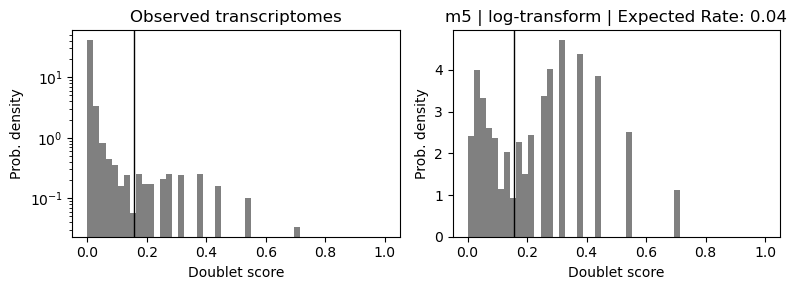

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.33
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 23.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.6%
Elapsed time: 4.8 seconds


<Figure size 640x480 with 0 Axes>

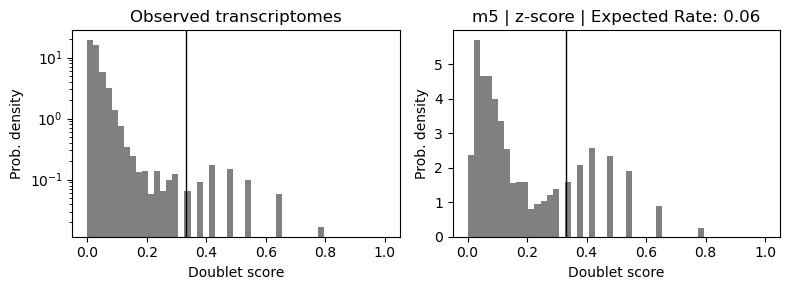

Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.21
Detected doublet rate = 3.9%
Estimated detectable doublet fraction = 63.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 6.1%
Elapsed time: 3.9 seconds


<Figure size 640x480 with 0 Axes>

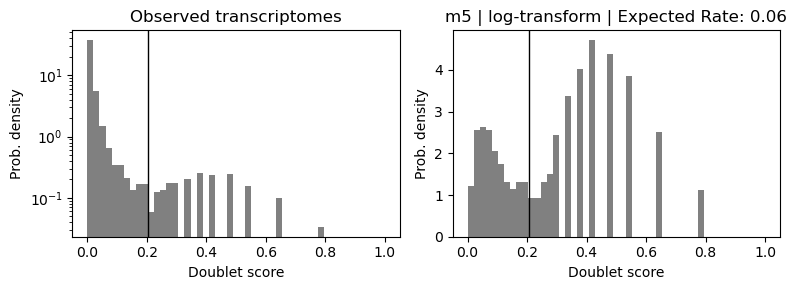

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.34
Detected doublet rate = 1.8%
Estimated detectable doublet fraction = 28.9%
Overall doublet rate:
	Expected   = 8.0%
	Estimated  = 6.2%
Elapsed time: 4.6 seconds


<Figure size 640x480 with 0 Axes>

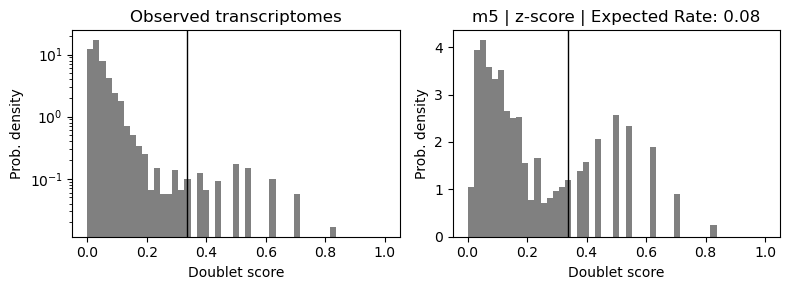

Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.25
Detected doublet rate = 4.1%
Estimated detectable doublet fraction = 65.0%
Overall doublet rate:
	Expected   = 8.0%
	Estimated  = 6.3%
Elapsed time: 4.2 seconds


<Figure size 640x480 with 0 Axes>

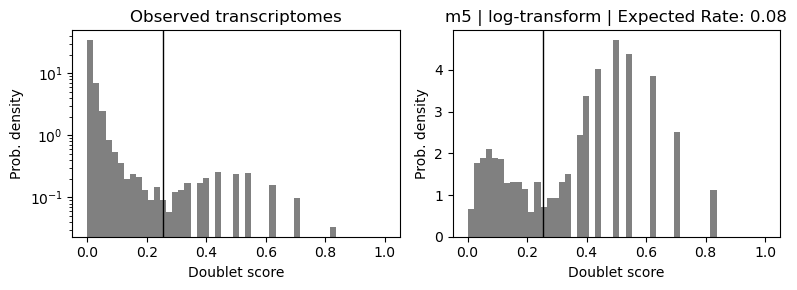

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.36
Detected doublet rate = 1.9%
Estimated detectable doublet fraction = 31.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 6.2%
Elapsed time: 4.6 seconds


<Figure size 640x480 with 0 Axes>

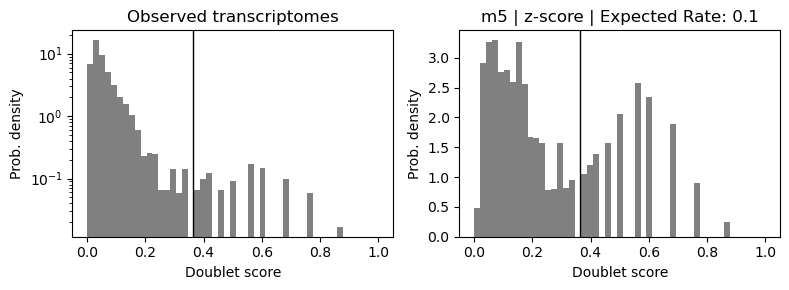

Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.30
Detected doublet rate = 4.1%
Estimated detectable doublet fraction = 65.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 6.3%
Elapsed time: 3.8 seconds


<Figure size 640x480 with 0 Axes>

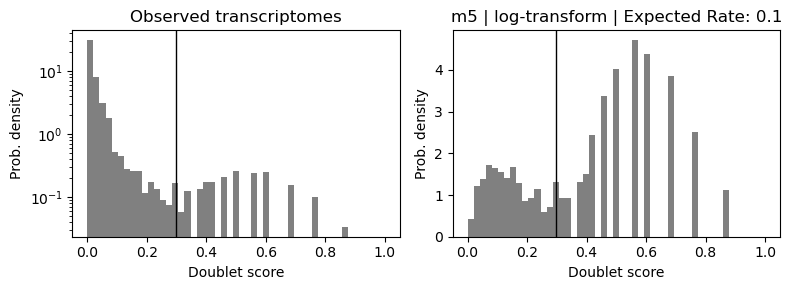

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.51
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 1.2%
Overall doublet rate:
	Expected   = 4.0%
	Estimated  = 8.6%
Elapsed time: 4.5 seconds


<Figure size 640x480 with 0 Axes>

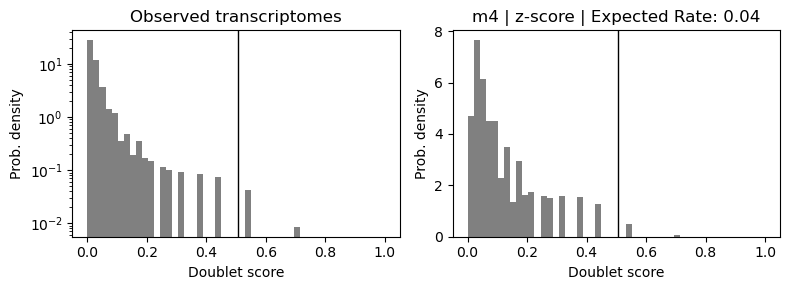

Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.50
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 3.8%
Overall doublet rate:
	Expected   = 4.0%
	Estimated  = 6.8%
Elapsed time: 3.9 seconds


<Figure size 640x480 with 0 Axes>

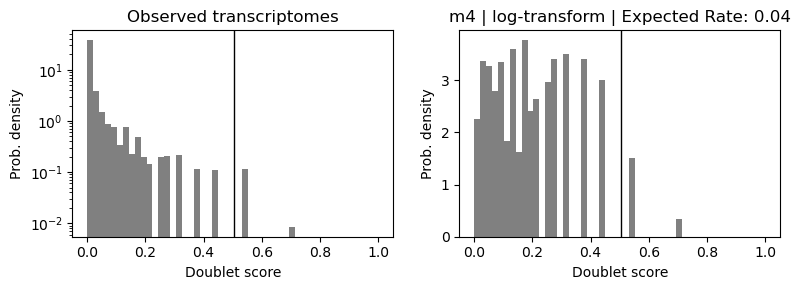

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.61
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 1.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.6%
Elapsed time: 4.5 seconds


<Figure size 640x480 with 0 Axes>

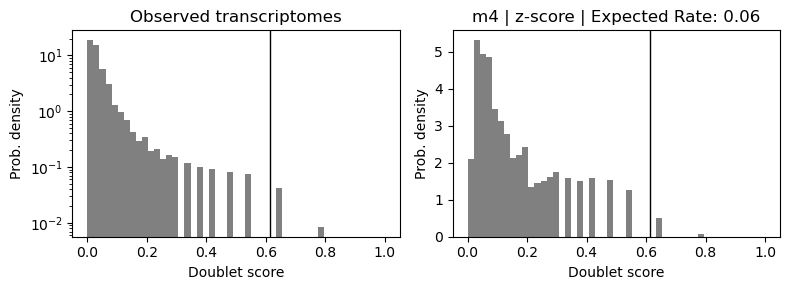

Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.16
Detected doublet rate = 6.0%
Estimated detectable doublet fraction = 67.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.9%
Elapsed time: 3.9 seconds


<Figure size 640x480 with 0 Axes>

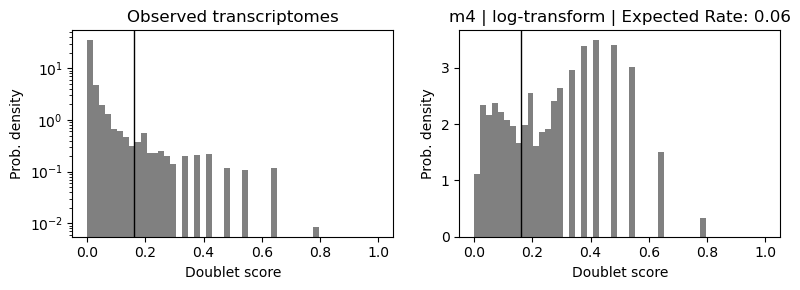

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.69
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 1.2%
Overall doublet rate:
	Expected   = 8.0%
	Estimated  = 8.6%
Elapsed time: 4.7 seconds


<Figure size 640x480 with 0 Axes>

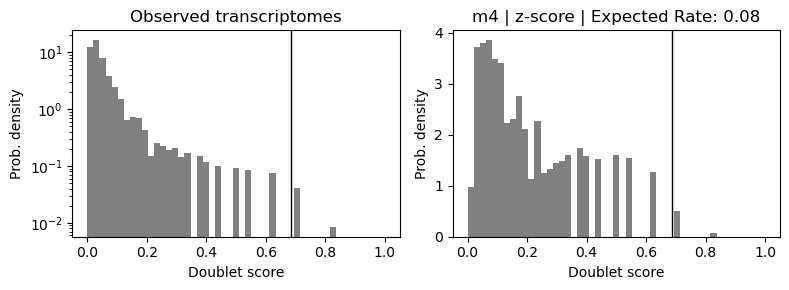

Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.19
Detected doublet rate = 6.6%
Estimated detectable doublet fraction = 70.9%
Overall doublet rate:
	Expected   = 8.0%
	Estimated  = 9.4%
Elapsed time: 3.8 seconds


<Figure size 640x480 with 0 Axes>

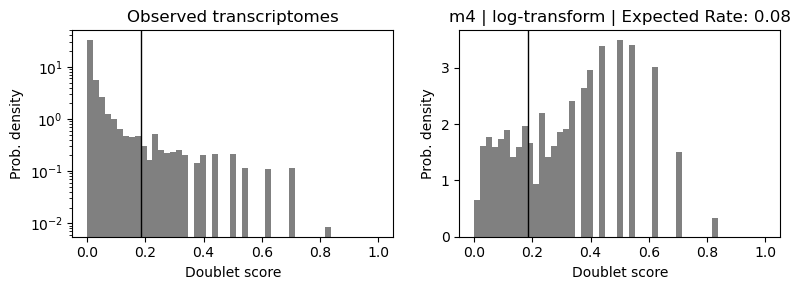

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.74
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 1.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 8.6%
Elapsed time: 4.4 seconds


<Figure size 640x480 with 0 Axes>

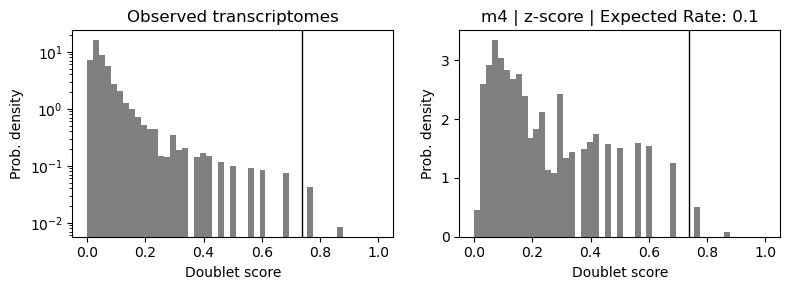

Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.20
Detected doublet rate = 7.3%
Estimated detectable doublet fraction = 73.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 9.9%
Elapsed time: 3.7 seconds


<Figure size 640x480 with 0 Axes>

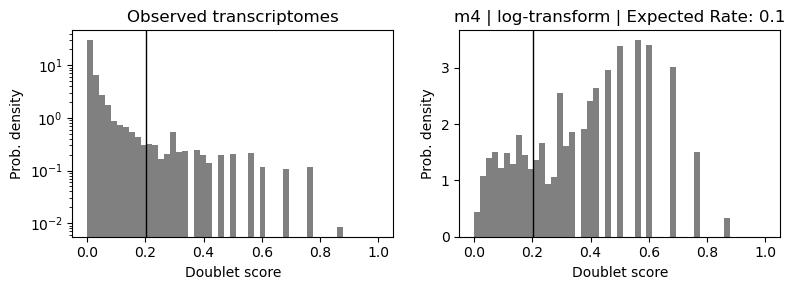

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.50
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.3%
Overall doublet rate:
	Expected   = 4.0%
	Estimated  = 0.0%
Elapsed time: 4.9 seconds


<Figure size 640x480 with 0 Axes>

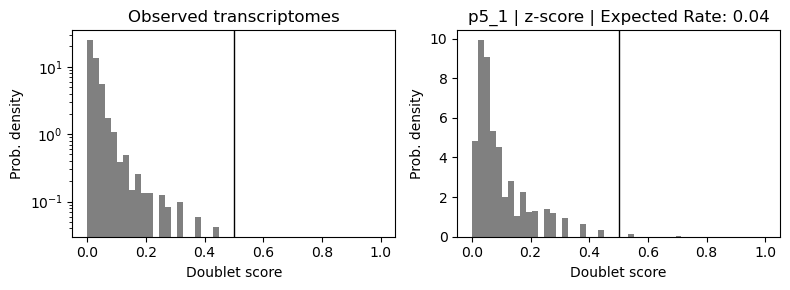

Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.16
Detected doublet rate = 3.3%
Estimated detectable doublet fraction = 54.9%
Overall doublet rate:
	Expected   = 4.0%
	Estimated  = 6.1%
Elapsed time: 3.7 seconds


<Figure size 640x480 with 0 Axes>

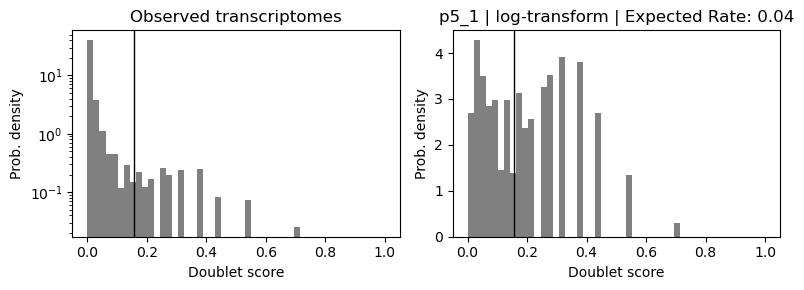

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.61
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.0%
Elapsed time: 4.7 seconds


<Figure size 640x480 with 0 Axes>

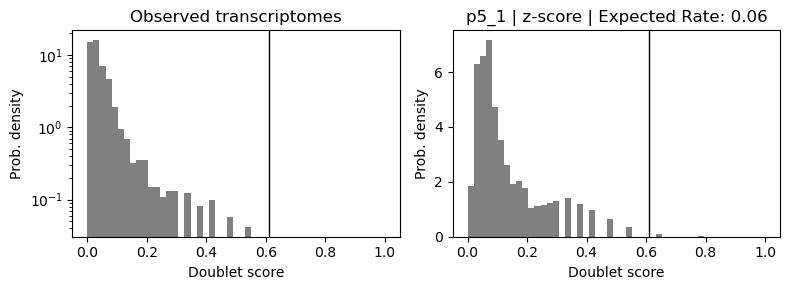

Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.19
Detected doublet rate = 4.1%
Estimated detectable doublet fraction = 62.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 6.6%
Elapsed time: 3.9 seconds


<Figure size 640x480 with 0 Axes>

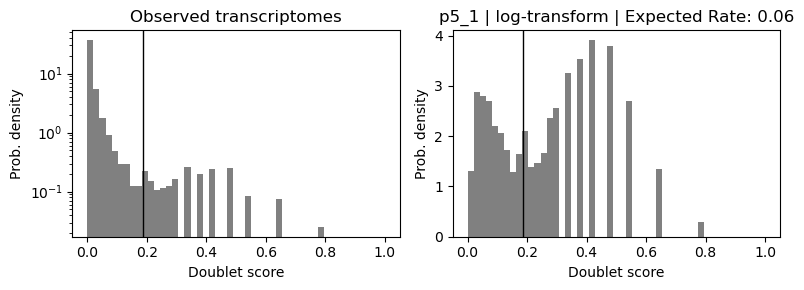

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.69
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.3%
Overall doublet rate:
	Expected   = 8.0%
	Estimated  = 0.0%
Elapsed time: 4.8 seconds


<Figure size 640x480 with 0 Axes>

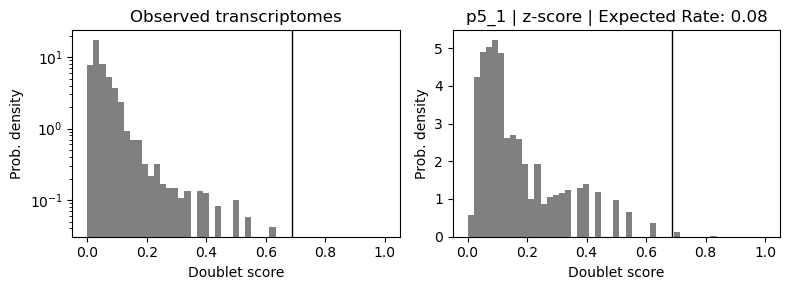

Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.21
Detected doublet rate = 4.4%
Estimated detectable doublet fraction = 65.4%
Overall doublet rate:
	Expected   = 8.0%
	Estimated  = 6.7%
Elapsed time: 4.1 seconds


<Figure size 640x480 with 0 Axes>

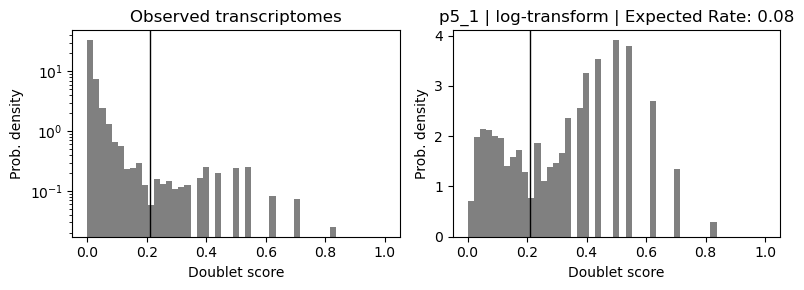

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.73
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 4.6 seconds


<Figure size 640x480 with 0 Axes>

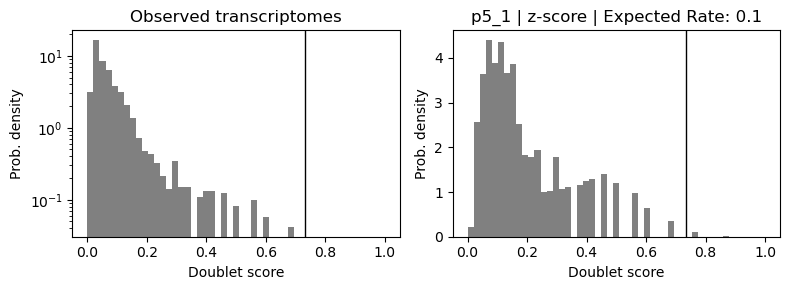

Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.25
Detected doublet rate = 4.4%
Estimated detectable doublet fraction = 65.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 6.7%
Elapsed time: 3.8 seconds


<Figure size 640x480 with 0 Axes>

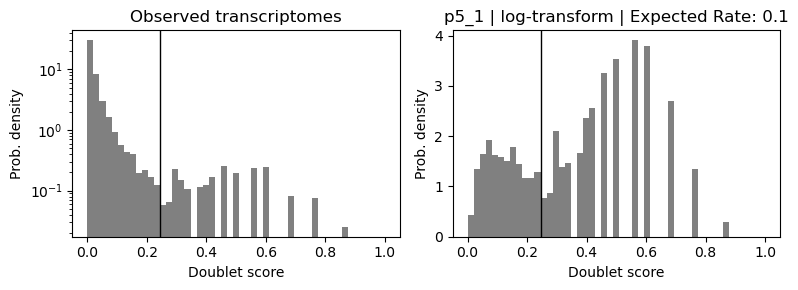

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.50
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 2.1%
Overall doublet rate:
	Expected   = 4.0%
	Estimated  = 4.9%
Elapsed time: 4.9 seconds


<Figure size 640x480 with 0 Axes>

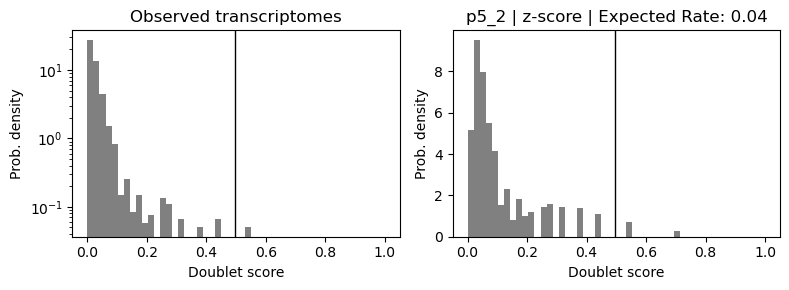

Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.17
Detected doublet rate = 2.9%
Estimated detectable doublet fraction = 52.3%
Overall doublet rate:
	Expected   = 4.0%
	Estimated  = 5.5%
Elapsed time: 4.1 seconds


<Figure size 640x480 with 0 Axes>

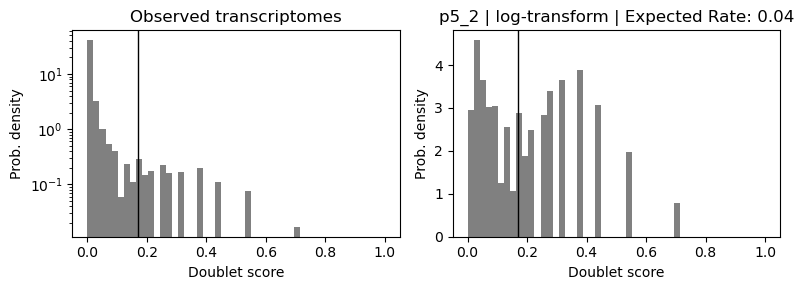

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.60
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 2.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.9%
Elapsed time: 4.7 seconds


<Figure size 640x480 with 0 Axes>

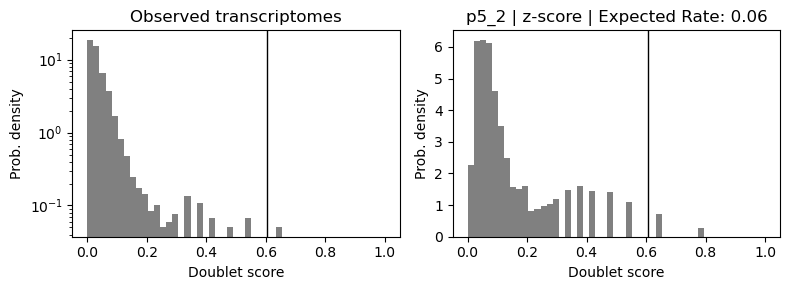

Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.20
Detected doublet rate = 3.4%
Estimated detectable doublet fraction = 57.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 6.0%
Elapsed time: 3.8 seconds


<Figure size 640x480 with 0 Axes>

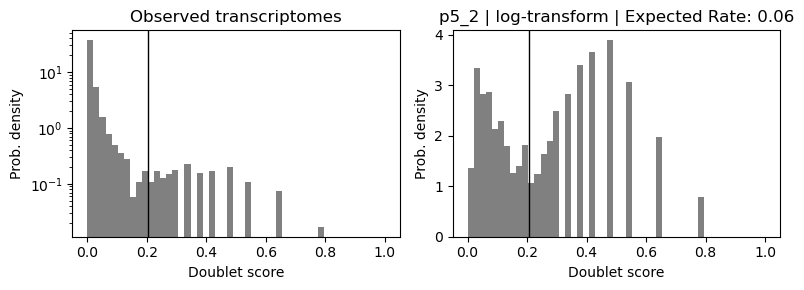

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.68
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 2.1%
Overall doublet rate:
	Expected   = 8.0%
	Estimated  = 4.9%
Elapsed time: 4.7 seconds


<Figure size 640x480 with 0 Axes>

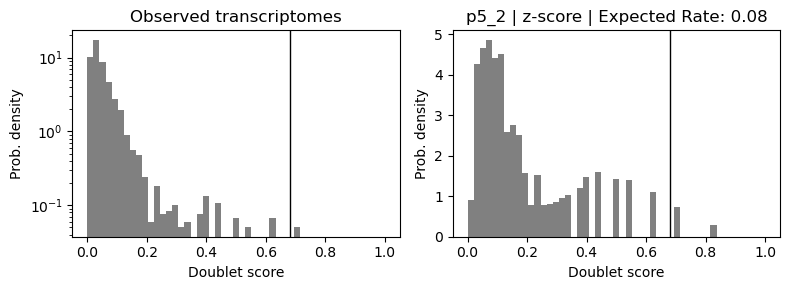

Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.24
Detected doublet rate = 3.8%
Estimated detectable doublet fraction = 60.7%
Overall doublet rate:
	Expected   = 8.0%
	Estimated  = 6.2%
Elapsed time: 3.7 seconds


<Figure size 640x480 with 0 Axes>

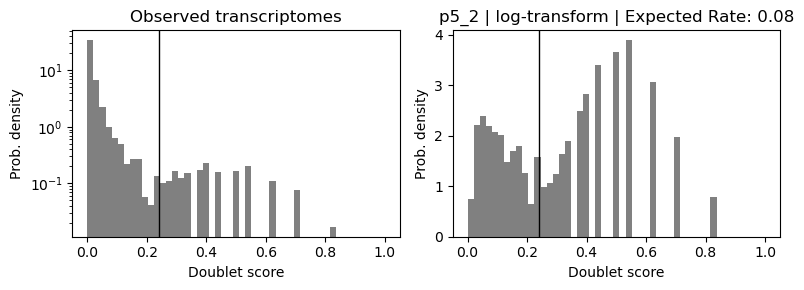

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.40
Detected doublet rate = 1.2%
Estimated detectable doublet fraction = 20.9%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 6.0%
Elapsed time: 4.6 seconds


<Figure size 640x480 with 0 Axes>

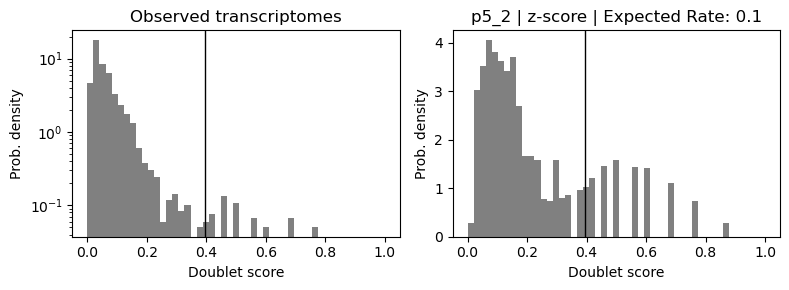

Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.27
Detected doublet rate = 3.8%
Estimated detectable doublet fraction = 60.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 6.2%
Elapsed time: 4.3 seconds


<Figure size 640x480 with 0 Axes>

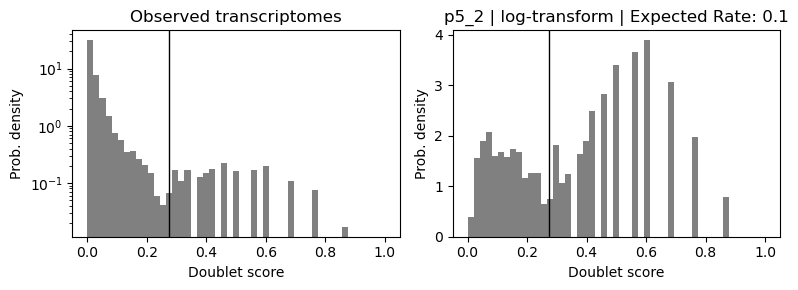

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.50
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 3.3%
Overall doublet rate:
	Expected   = 4.0%
	Estimated  = 6.2%
Elapsed time: 5.0 seconds


<Figure size 640x480 with 0 Axes>

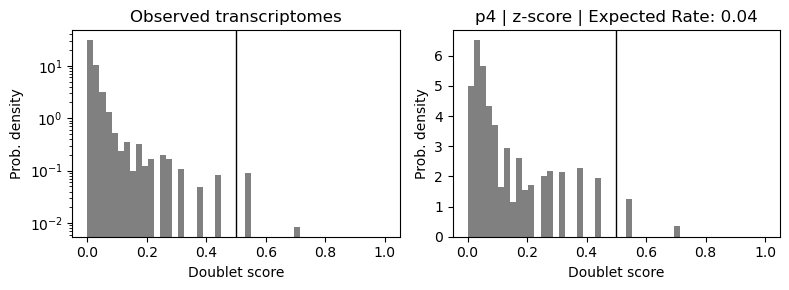

Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 4.7%
Estimated detectable doublet fraction = 67.5%
Overall doublet rate:
	Expected   = 4.0%
	Estimated  = 7.0%
Elapsed time: 4.4 seconds


<Figure size 640x480 with 0 Axes>

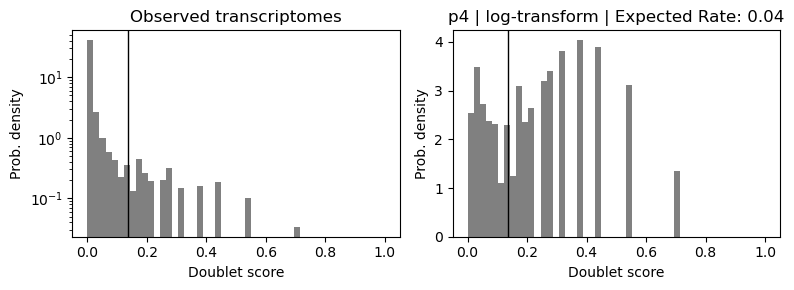

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.60
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 3.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 6.2%
Elapsed time: 4.8 seconds


<Figure size 640x480 with 0 Axes>

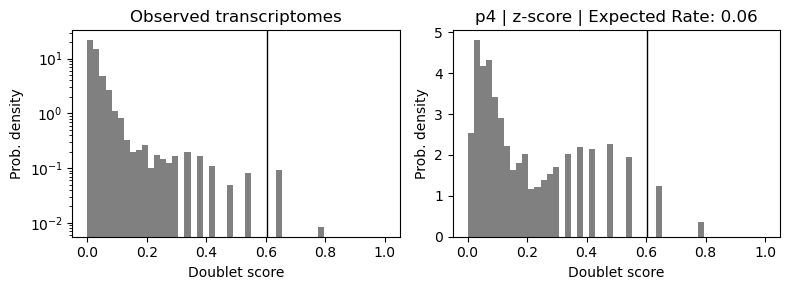

Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.17
Detected doublet rate = 5.1%
Estimated detectable doublet fraction = 70.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 7.3%
Elapsed time: 4.0 seconds


<Figure size 640x480 with 0 Axes>

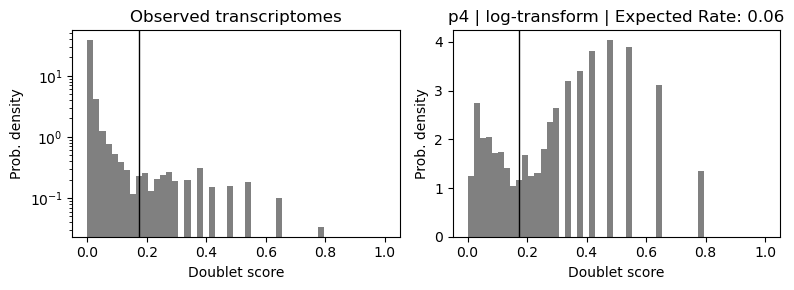

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.68
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 3.3%
Overall doublet rate:
	Expected   = 8.0%
	Estimated  = 6.2%
Elapsed time: 5.2 seconds


<Figure size 640x480 with 0 Axes>

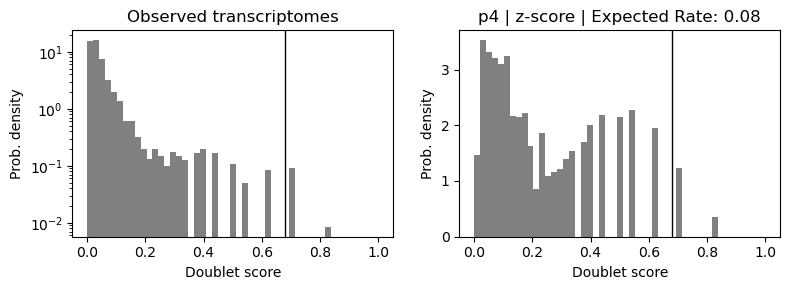

Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.21
Detected doublet rate = 5.4%
Estimated detectable doublet fraction = 71.5%
Overall doublet rate:
	Expected   = 8.0%
	Estimated  = 7.6%
Elapsed time: 3.8 seconds


<Figure size 640x480 with 0 Axes>

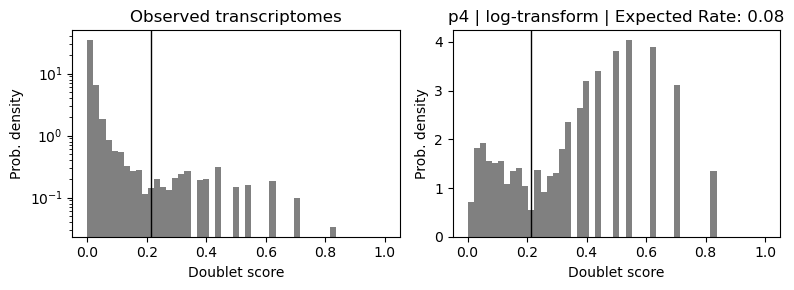

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.73
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 3.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 6.2%
Elapsed time: 4.6 seconds


<Figure size 640x480 with 0 Axes>

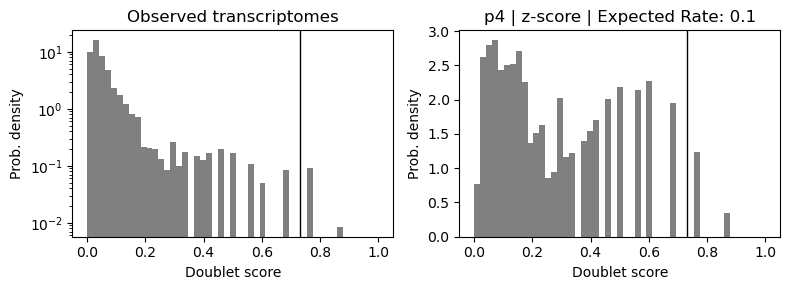

Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.25
Detected doublet rate = 5.4%
Estimated detectable doublet fraction = 71.5%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 7.6%
Elapsed time: 3.8 seconds


<Figure size 640x480 with 0 Axes>

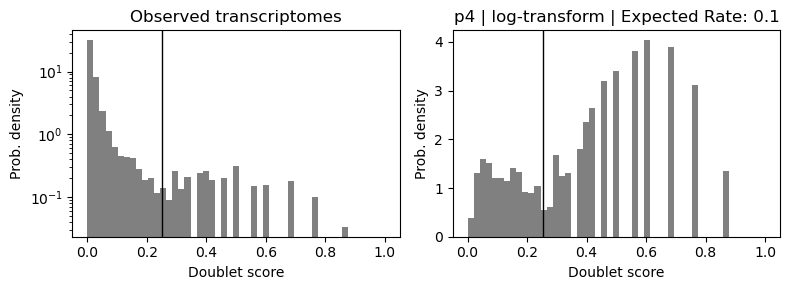

In [13]:
#scrublet
expected_rates = [0.04, 0.06, 0.08, 0.10]
methods = ['zscore', 'log']

for name, adata in adatas.items():
    counts_matrix = adata.X.copy()
    if not isinstance(counts_matrix, np.ndarray):
        counts_matrix = counts_matrix.toarray()

    for expected_rate in expected_rates:
        for method in methods:
            if method == 'zscore':
                scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=expected_rate)
                doublet_scores, predicted_doublets = scrub.scrub_doublets(
                    n_prin_comps=30,
                    mean_center=True,
                    normalize_variance=True,
                    log_transform=False
                )
                title = f"{name} | z-score | Expected Rate: {expected_rate}"

            elif method == 'log':
                scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=expected_rate)
                doublet_scores, predicted_doublets = scrub.scrub_doublets(
                    n_prin_comps=30,
                    mean_center=False,
                    normalize_variance=False,
                    log_transform=True
                )
                title = f"{name} | log-transform | Expected Rate: {expected_rate}"

            # Show histogram for inspection
            plt.figure()
            scrub.plot_histogram()
            plt.title(title)
            plt.show()
            plt.close()

In [14]:
scrublet_params = {
    'm5': {'expected_rate': 0.06, 'log_transform': True, 'threshold': 0.2},
    'p5_1': {'expected_rate': 0.06, 'log_transform': False,  'threshold': 0.6},
    'p5_2': {'expected_rate': 0.06, 'log_transform': True, 'threshold': 0.25},
    'm4': {'expected_rate': 0.08, 'log_transform': True,  'threshold': 0.2},
    'p4': {'expected_rate': 0.06, 'log_transform': True, 'threshold': 0.2}
}

In [15]:
adatas_clean = {}

for name, adata in adatas.items():
    params = scrublet_params[name]
    
    counts_matrix = adata.X.copy()
    if not isinstance(counts_matrix, np.ndarray):
        counts_matrix = counts_matrix.toarray()
    
    scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=params['expected_rate'])
    
    doublet_scores, predicted_doublets = scrub.scrub_doublets(
        n_prin_comps=30,
        mean_center=not params['log_transform'],
        normalize_variance=not params['log_transform'],
        log_transform=params['log_transform']
    )
    
    scrub.call_doublets(threshold=params['threshold'])
    
    adata.obs['doublet_score'] = scrub.doublet_scores_obs_
    adata.obs['predicted_doublet'] = scrub.predicted_doublets_
    
    adatas_clean[name] = adata[adata.obs['predicted_doublet'] == False].copy()

Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.21
Detected doublet rate = 3.9%
Estimated detectable doublet fraction = 63.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 6.1%
Elapsed time: 3.8 seconds
Detected doublet rate = 4.1%
Estimated detectable doublet fraction = 65.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 6.3%
Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.19
Detected doublet rate = 6.6%
Estimated detectable doublet fraction = 70.9%
Overall doublet rate:
	Expected   = 8.0%
	Estimated  = 9.4%
Elapsed time: 3.7 seconds
Detected doublet rate = 6.4%
Estimated detectable doublet fraction = 69.3%
Overall doublet rate:
	Expected   = 8.0%
	Estimated  = 9.2%
Preprocessing...
Simulating doublets...
Embedding transcriptomes usi

In [17]:
adata_combined = ad.concat(
    adatas_clean.values(),
    label="sample",
    keys=adatas_clean.keys()
)

In [18]:
adata_combined.write("/blue/square.t/peter.huynh/jupyter/combined_samples_scvelo/data/processed/adata_combined.h5ad")